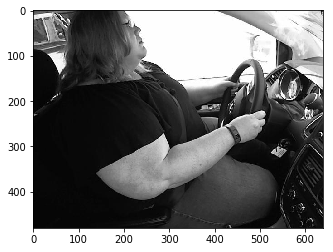

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


img_width, img_height = 640, 480

# training path
DATADIR = "/Users/crisramos/Desktop/Deep Learning/Project FArmerINsurance/imgs/train"
categories= [ 'c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

for category in categories:
    path  = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break



#307200 size of pics




In [3]:
print(img_array)
#IMG_SIZE = 480*640 

[[68 67 67 ... 45 56 91]
 [70 69 69 ... 76 73 69]
 [72 71 71 ... 86 78 74]
 ...
 [ 5  5  5 ... 15 15 14]
 [ 5  5  5 ... 14 15 16]
 [ 5  5  5 ... 13 15 17]]


In [4]:
training_data = []
def create_td():
    for category in categories:
        path  = os.path.join(DATADIR, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            training_data.append([img_array,class_num])
            

        
        
        
        

In [5]:
create_td()
print(len(training_data))

10000


In [6]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

7
8
4
7
9
9
2
2
0
9


In [7]:
X= []
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X= np.array(X).reshape(-1, 480,640,1)  #if its color 1 has tobe 3!!! 

In [9]:

import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
#print(X[0])
#print(y[0])

OSError: [Errno 22] Invalid argument

In [10]:
pickle_in= open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in= open("y.pickle","rb")
y = pickle.load(pickle_in)

(5000, 10)


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = X / 255
model=Sequential()
model.add(   Conv2D(64,(3,3),input_shape= X.shape[1:])  )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

fitted_model= model.fit(X,y, epochs= 3, validation_split=.1,
                        batch_size=32, verbose= 1)

Instructions for updating:
Colocations handled automatically by placer.
Train on 9000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
9000/9000 [==============================] - 19147s 2s/sample - loss: -55.8481 - acc: 0.0994 - val_loss: -53.5983 - val_acc: 0.1050
Epoch 2/3
9000/9000 [==============================] - 20671s 2s/sample - loss: -56.0428 - acc: 0.0994 - val_loss: -53.5983 - val_acc: 0.1050
Epoch 3/3
1760/9000 [====>.........................] - ETA: 4:24:20 - loss: -56.3237 - acc: 0.0994

In [ ]:
import cv2
import tensorflow as tf
categories= [ 'c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']


X_test= []

path='/Users/crisramos/Desktop/Deep Learning/Project FArmerINsurance/imgs/test'# testing path
testing_set=[]

for img in os.listdir(path):
    img_array=cv2.imgread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    testing_set.append([img_array])
        
X_test= np.array(testing_set).reshape(-1, 480,640,1)    
     


prediction=fitted_model.predict(X_test)

print(prediction)

In [ ]:
#print('img_'+str(3)+'.jpg')